# Lab session 2: Adversarial Machine Learning

In [1]:
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_params = [dict(n_samples = 100,
                       centers = [[1, 2], [7, 5.5]],
                       cluster_std = 0.35),
                  dict(n_samples = 150,
                  centers = [[2, 0], [6, 4], [-2, 4]],
                  cluster_std = 0.8)]

**1. Plot data and the decision boundary for 2 classes**

/tmp/ipykernel_2910/3204488237.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')


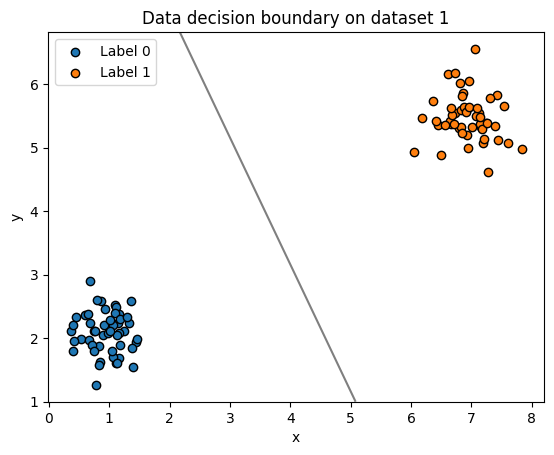

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
fig = plt.figure()


n_samples, centers, cluster_std = dataset_params[0].values()
X, y = make_blobs(n_samples = n_samples, centers = centers, cluster_std = cluster_std)
ax = fig.add_subplot(1, 1, 1)

clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')
    
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Data decision boundary on dataset 1')
ax.legend()
plt.show()

**2.Plot data and the decision boundary for 3 classes, and identify absolute vs relative prediction
zones**

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


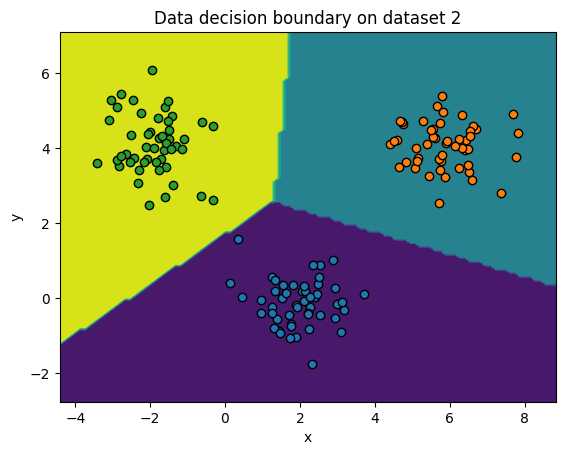

In [72]:
n_samples, centers, cluster_std = dataset_params[1].values()
X, y = make_blobs(n_samples = n_samples, centers = centers, cluster_std = cluster_std)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
clf = svm.LinearSVC(C=1)
clf.fit(X, y)
display = DecisionBoundaryDisplay.from_estimator(clf, X,ax=ax)
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",edgecolors='black')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Data decision boundary on dataset 2')
plt.show()

**3. Plot support vectors (using black cycles), adversarial points (in green) as well as the alteration
between original and altered points as green dotted line.**

In [17]:
def fgsm_attack_svm_2c(classifier:svm.SVC, orig_point, dist_function, step=None, epsilon=np.inf, max_step=200):
    data_point = orig_point.copy()
    orig_class = classifier.predict(data_point.reshape(1, -1))[0]
    new_class = orig_class
    current_eps = dist_function(data_point,orig_point)
    attack_info = None
    if step is None:
        step = 0.05
    i =0
    data_points_pos =[data_point]
    while orig_class == new_class:
        if current_eps < epsilon and i < max_step:
            grad =  classifier.coef_[0]
            data_point = data_point + step *  grad
            data_points_pos.append(data_point)
            new_class = classifier.predict(data_point.reshape(1, -1))[0]
            current_eps = dist_function(data_point,orig_point)
            attack_info = data_point, current_eps
        else:
            attack_info = (None, None)
            break
        i += 1
    return attack_info

/tmp/ipykernel_2910/2666390155.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')


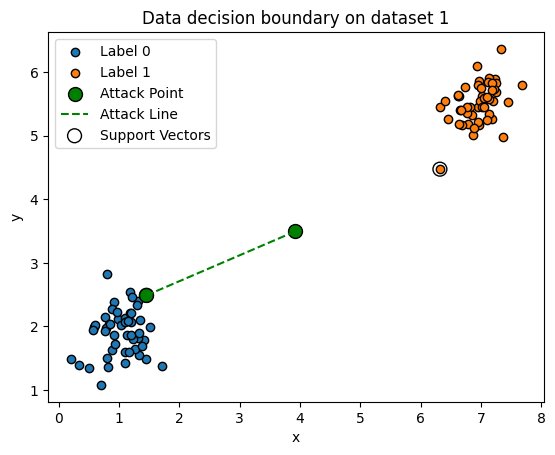

In [63]:
from sklearn.inspection import DecisionBoundaryDisplay
fig = plt.figure()


n_samples, centers, cluster_std = dataset_params[0].values()
X, y = make_blobs(n_samples = n_samples, centers = centers, cluster_std = cluster_std)
ax = fig.add_subplot(1, 1, 1)

clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')

distance_function = lambda x, y: np.linalg.norm(x-y)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

support_vectors = clf.support_vectors_
vec = clf.support_vectors_[0]
attack_point,_ = fgsm_attack_svm_2c(clf, vec, dist_function=distance_function, step=0.1)


# plot attack point
ax.scatter(attack_point[0], attack_point[1], s=100,facecolor='green', label='Attack Point' ,edgecolors='black')
# plot line between attack point and support vector

ax.plot([attack_point[0], vec[0]], [attack_point[1], vec[1]], color='green', linestyle='--', label='Attack Line')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, edgecolors='k',facecolor='none', label='Support Vectors')
ax.scatter(support_vectors[:1, 0], support_vectors[:1, 1], s=100,
            linewidth=1, edgecolors='k',facecolor='green')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Data decision boundary on dataset 1')
ax.legend()
plt.show()

**4. Bonus: show the linear decision function**

/tmp/ipykernel_2910/1588172799.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')
/tmp/ipykernel_2910/1588172799.py:45: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z, colors='blue', levels=[0], alpha=0.5, linestyles=['-'], label=line_label)


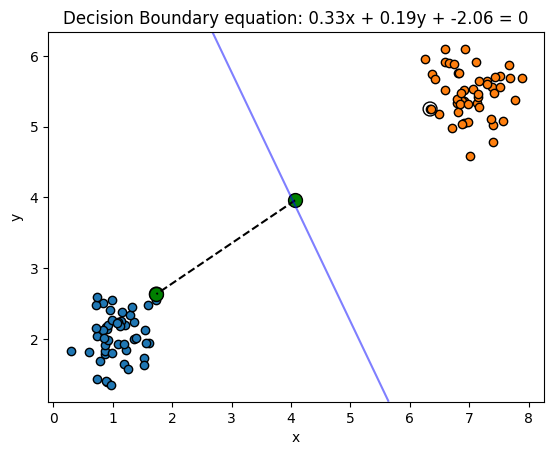

In [69]:
fig = plt.figure()


n_samples, centers, cluster_std = dataset_params[0].values()
X, y = make_blobs(n_samples = n_samples, centers = centers, cluster_std = cluster_std)
ax = fig.add_subplot(1, 1, 1)

clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')

distance_function = lambda x, y: np.linalg.norm(x-y)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

support_vectors = clf.support_vectors_
vec = clf.support_vectors_[0]
attack_point,_ = fgsm_attack_svm_2c(clf, vec, dist_function=distance_function, step=0.1)


# plot attack point
ax.scatter(attack_point[0], attack_point[1], s=100,facecolor='green', label='Attack Point' ,edgecolors='black')
# plot line between attack point and support vector

ax.plot([attack_point[0], vec[0]], [attack_point[1], vec[1]], color='black', linestyle='--', label='Attack Line')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, edgecolors='k',facecolor='none', label='Support Vectors')
ax.scatter(support_vectors[:1, 0], support_vectors[:1, 1], s=100,
            linewidth=1, edgecolors='k',facecolor='green')
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

a = clf.coef_[0][0]
b = clf.coef_[0][1]
c = clf.intercept_[0]

line_label = f'Decision Boundary equation: {a:.2f}x + {b:.2f}y + {c:.2f} = 0'

ax.contour(xx, yy, Z, colors='blue', levels=[0], alpha=0.5, linestyles=['-'], label=line_label)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(line_label)

plt.show()